## Day 26 Lecture 1 Assignment

In this assignment, we will learn about linear regression models and how to plot them using the sklearn library

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [2]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

In [3]:
lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [10]:
# answer below:
lager = lager.drop('beer', axis = 1)
lager

,tpc,ma,dsa,asa,orac,rp,mca
0,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,146.03,11.72,0.64,0.90,3.18,0.47,9.39
5,180.19,9.33,0.62,1.48,4.33,0.71,23.38
6,169.06,8.27,0.58,1.45,5.82,0.68,26.09
7,119.04,12.06,0.47,1.17,1.50,0.57,22.50
8,158.99,9.06,0.59,2.23,2.50,0.65,6.39
9,153.04,10.71,0.72,1.52,2.55,0.63,18.39


Next check the data to make sure there is no missing data. Remove rows containing missing data if it exists.

In [11]:
# answer below:
lager = lager.dropna()


Plot the scatter matrix for all variables in the dataset. Do all variables have a pairwise linear relationship?

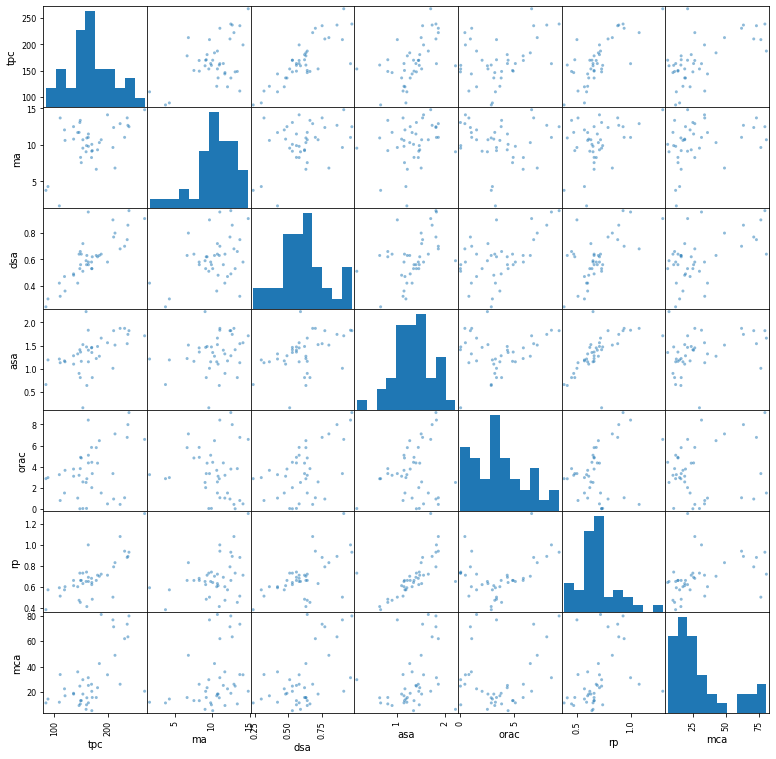

In [18]:
#Not all of them have linear relationship.
pd.plotting.scatter_matrix(lager,figsize=(13,13))
plt.show()

We would like to split the data into train and test samples. Use `tpc` as the y column and split the data with 25% of the data in the test sample.

In [21]:
# answer below:
from sklearn.model_selection import train_test_split
y = lager['tpc']
X = lager.drop('tpc', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


Using sklearn, train the model and print out the coefficients and intercept.

In [26]:
# answer below:
from sklearn.linear_model import LinearRegression

line = LinearRegression().fit(X_train, y_train)

line.intercept_, line.coef_

(25.26513786494411,
 array([  1.36207256, 139.32336918,  -1.58554263,  -2.72021148,
         64.13722213,   0.35732077]))